# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [245]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [246]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Dropout
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler



## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [247]:
df=pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [248]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [250]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [251]:
df.isna().sum()


,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [252]:
df.duplicated().sum()

0

In [253]:
df=df.dropna()

In [254]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5024 entries, 1375 to 147969
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   School_Year                      5024 non-null   object
 1   Busbreakdown_ID                  5024 non-null   int64 
 2   Run_Type                         5024 non-null   object
 3   Bus_No                           5024 non-null   object
 4   Route_Number                     5024 non-null   object
 5   Reason                           5024 non-null   object
 6   Schools_Serviced                 5024 non-null   object
 7   Occurred_On                      5024 non-null   object
 8   Created_On                       5024 non-null   object
 9   Boro                             5024 non-null   object
 10  Bus_Company_Name                 5024 non-null   object
 11  How_Long_Delayed                 5024 non-null   object
 12  Number_Of_Students_On_The_Bus    5

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [256]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'School_Year':
['2015-2016' '2016-2017' '2017-2018']

Unique values in 'Busbreakdown_ID':
[1225377 1216474 1226096 ... 1356198 1357686 1353044]

Unique values in 'Run_Type':
['Special Ed AM Run' 'Special Ed PM Run' 'General Ed AM Run'
 'General Ed PM Run' 'General Ed Field Trip' 'Project Read PM Run'
 'Project Read AM Run' 'Special Ed Field Trip']

Unique values in 'Bus_No':
['1296' '19340' 'GC0085' ... '60111' '1009' '1644']

Unique values in 'Route_Number':
['P615' 'M147' 'X979' ... 'X9669' 'X929' 'K9026']

Unique values in 'Reason':
['Accident' 'Other' 'Delayed by School' 'Heavy Traffic'
 'Mechanical Problem' 'Flat Tire' 'Won`t Start' 'Weather Conditions'
 'Late return from Field Trip' 'Problem Run']

Unique values in 'Schools_Serviced':
['25154' '02347' '07223' '13508,17316' '09462' '08420' '10475' '08498'
 '08464' '10046' '11674' '17289' '09163' '75419' '14380'
 '15628, 15689, 15704' '75407' '75955' '07004' '10444' '02751'
 '10037,10553' '05100' '75327' '10118' '1

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5024 entries, 1375 to 147969
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   School_Year                      5024 non-null   object
 1   Busbreakdown_ID                  5024 non-null   int64 
 2   Run_Type                         5024 non-null   object
 3   Bus_No                           5024 non-null   object
 4   Route_Number                     5024 non-null   object
 5   Reason                           5024 non-null   object
 6   Schools_Serviced                 5024 non-null   object
 7   Occurred_On                      5024 non-null   object
 8   Created_On                       5024 non-null   object
 9   Boro                             5024 non-null   object
 10  Bus_Company_Name                 5024 non-null   object
 11  How_Long_Delayed                 5024 non-null   object
 12  Number_Of_Students_On_The_Bus    5

In [258]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5024 entries, 1375 to 147969
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   School_Year                      5024 non-null   object
 1   Busbreakdown_ID                  5024 non-null   int64 
 2   Run_Type                         5024 non-null   object
 3   Bus_No                           5024 non-null   object
 4   Route_Number                     5024 non-null   object
 5   Reason                           5024 non-null   object
 6   Schools_Serviced                 5024 non-null   object
 7   Occurred_On                      5024 non-null   object
 8   Created_On                       5024 non-null   object
 9   Boro                             5024 non-null   object
 10  Bus_Company_Name                 5024 non-null   object
 11  How_Long_Delayed                 5024 non-null   object
 12  Number_Of_Students_On_The_Bus    5

In [260]:
for col in ['School_Year', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5024 entries, 1375 to 147969
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   School_Year                      5024 non-null   int64
 1   Busbreakdown_ID                  5024 non-null   int64
 2   Run_Type                         5024 non-null   int64
 3   Bus_No                           5024 non-null   int64
 4   Route_Number                     5024 non-null   int64
 5   Reason                           5024 non-null   int64
 6   Schools_Serviced                 5024 non-null   int64
 7   Occurred_On                      5024 non-null   int64
 8   Created_On                       5024 non-null   int64
 9   Boro                             5024 non-null   int64
 10  Bus_Company_Name                 5024 non-null   int64
 11  How_Long_Delayed                 5024 non-null   int64
 12  Number_Of_Students_On_The_Bus    5024 non-null  

In [262]:
#columns=df.columns

#for col in columns:
#  Q1=df[col].quantile(0.25)
#  Q3=df[col].quantile(0.75)
#  IQR=Q3-Q1
#  lb = Q1 - 1.5 * IQR
#  ub = Q3 + 1.5 * IQR
#  df = df[(df[col] >= lb) & (df[col] <= ub)]



#deeting the outlaiers deleted the second catagoriy in the targeted data

In [263]:
df.shape

(5024, 21)

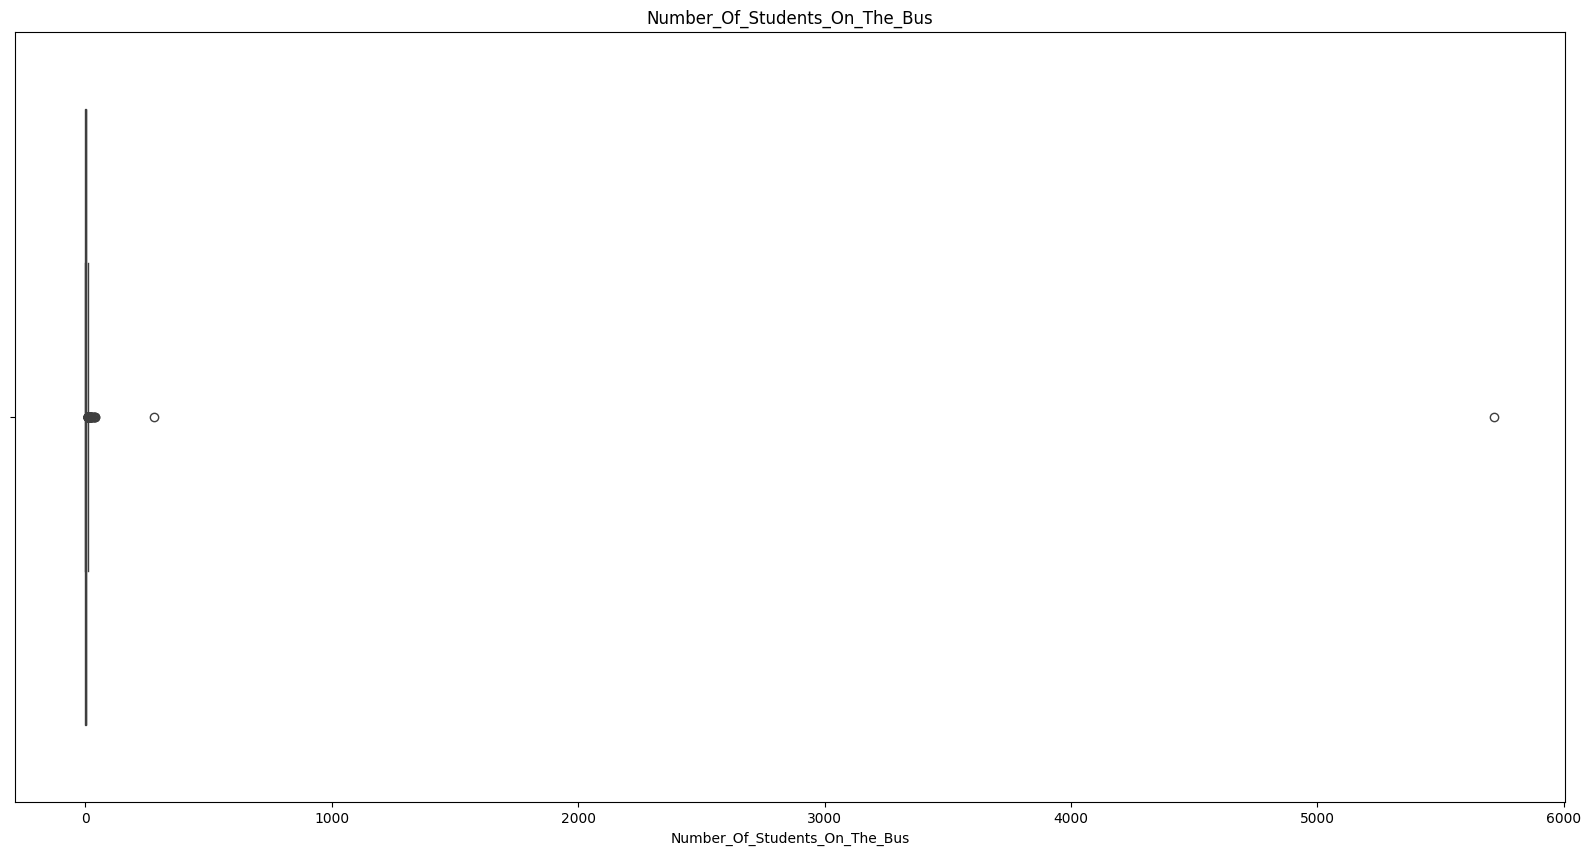

In [264]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['Number_Of_Students_On_The_Bus'])
plt.title('Number_Of_Students_On_The_Bus')
plt.show()

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [265]:
X=df.drop('Breakdown_or_Running_Late',axis=1)
y=df['Breakdown_or_Running_Late']

In [266]:
y.unique()

array([1, 0])

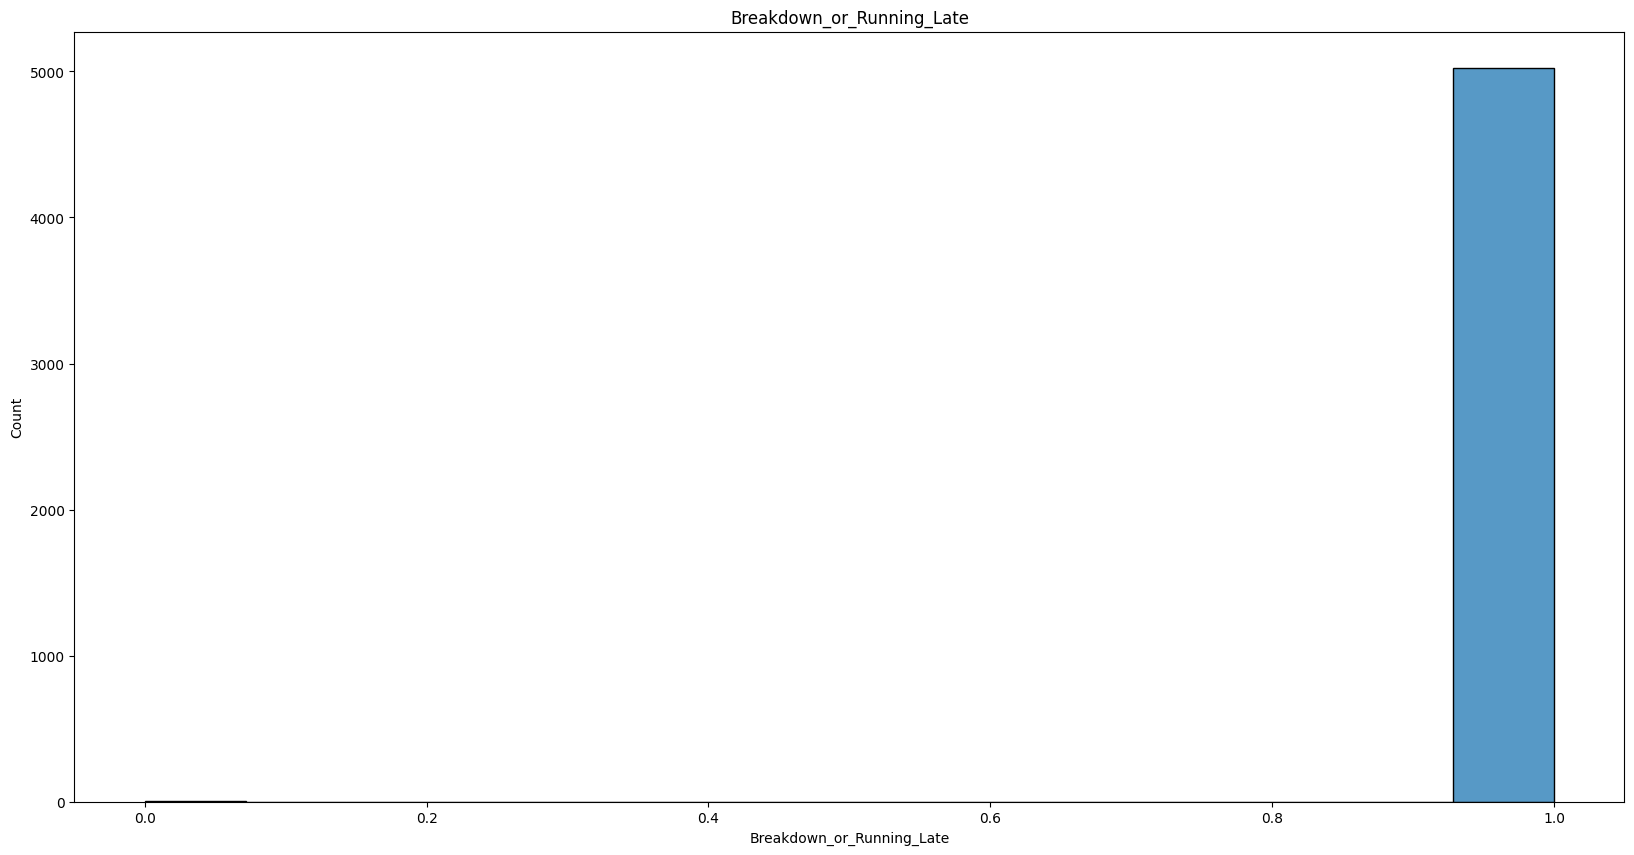

In [267]:
plt.figure(figsize=(20, 10))
sns.histplot(y)
plt.xlabel('Breakdown_or_Running_Late')
plt.title('Breakdown_or_Running_Late')
plt.show()

In [268]:
y.shape

(5024,)

In [269]:
X.shape

(5024, 20)

In [270]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5024 entries, 1375 to 147969
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   School_Year                      5024 non-null   int64
 1   Busbreakdown_ID                  5024 non-null   int64
 2   Run_Type                         5024 non-null   int64
 3   Bus_No                           5024 non-null   int64
 4   Route_Number                     5024 non-null   int64
 5   Reason                           5024 non-null   int64
 6   Schools_Serviced                 5024 non-null   int64
 7   Occurred_On                      5024 non-null   int64
 8   Created_On                       5024 non-null   int64
 9   Boro                             5024 non-null   int64
 10  Bus_Company_Name                 5024 non-null   int64
 11  How_Long_Delayed                 5024 non-null   int64
 12  Number_Of_Students_On_The_Bus    5024 non-null  

In [287]:


scaler = StandardScaler()
X_Scaled=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=X.columns)

In [288]:

unique_classes, counts = np.unique(y, return_counts=True)
smallest_class_size = np.min(counts)

k_neighbors = min(2, smallest_class_size - 1)
smote = SMOTE(k_neighbors=k_neighbors)
X, y = smote.fit_resample(X, y)

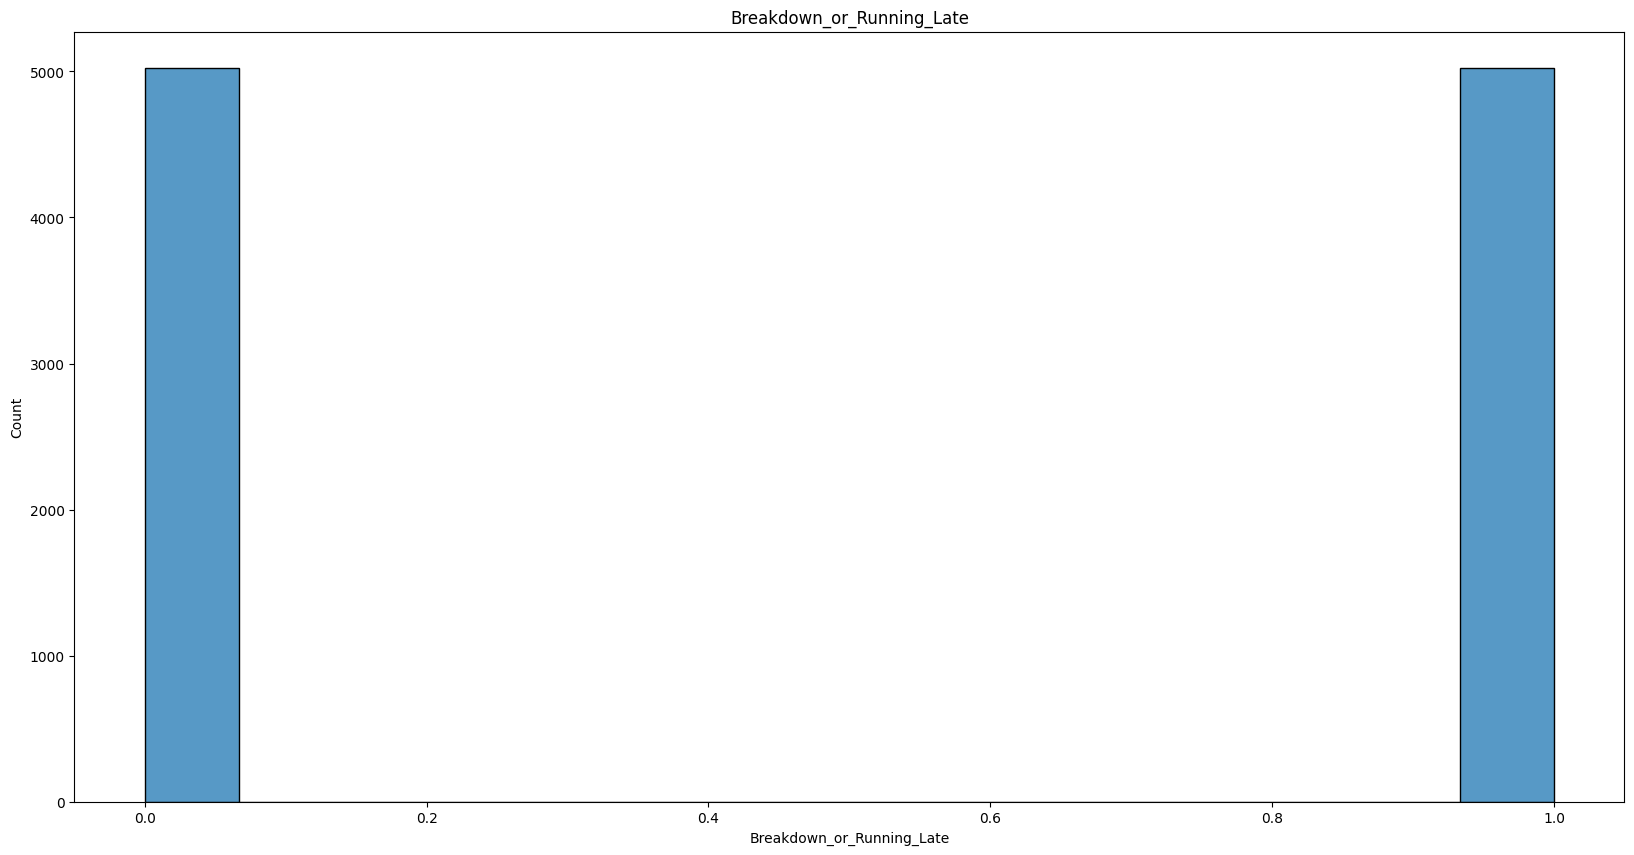

In [289]:
plt.figure(figsize=(20, 10))
sns.histplot(y)
plt.xlabel('Breakdown_or_Running_Late')
plt.title('Breakdown_or_Running_Late')
plt.show()

In [290]:
y.shape

(10044,)

In [291]:
X.shape

(10044, 20)

In [292]:
X.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,School_Age_or_PreK
0,0,1225377,5,209,473,0,760,4254,4387,4,0,195,0,1,1,1,4387,29,4535,0
1,0,1216474,7,407,258,0,42,4015,4143,4,5,271,8,1,1,1,4143,8,4289,0
2,0,1226096,5,905,1126,0,173,4266,4400,1,13,93,5,1,0,1,4400,30,4547,0
3,0,1226288,0,637,56,0,478,4268,4401,2,16,324,8,1,1,1,4401,32,4549,0
4,0,1213115,5,34,1067,0,280,3941,4067,1,15,263,1,1,1,1,4067,5,4213,0


In [293]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   School_Year                      10044 non-null  int64
 1   Busbreakdown_ID                  10044 non-null  int64
 2   Run_Type                         10044 non-null  int64
 3   Bus_No                           10044 non-null  int64
 4   Route_Number                     10044 non-null  int64
 5   Reason                           10044 non-null  int64
 6   Schools_Serviced                 10044 non-null  int64
 7   Occurred_On                      10044 non-null  int64
 8   Created_On                       10044 non-null  int64
 9   Boro                             10044 non-null  int64
 10  Bus_Company_Name                 10044 non-null  int64
 11  How_Long_Delayed                 10044 non-null  int64
 12  Number_Of_Students_On_The_Bus    10044 non-nul

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [327]:
model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [328]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [329]:
early_stoping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

In [330]:
history=model.fit(X_train,y_train,batch_size=512,epochs=150,validation_split=0.2,callbacks=early_stoping)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4981 - loss: 2677.5181 - val_accuracy: 0.5034 - val_loss: 17.3273
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4966 - loss: 165.2040 - val_accuracy: 0.5034 - val_loss: 38.3218
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5006 - loss: 64.6443 - val_accuracy: 0.4891 - val_loss: 1.1267
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4995 - loss: 25.1183 - val_accuracy: 0.4966 - val_loss: 3.4398
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4924 - loss: 11.3803 - val_accuracy: 0.4966 - val_loss: 2.9301
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5058 - loss: 8.3974 - val_accuracy: 0.5034 - val_loss: 0.7532
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5010 - loss: 2.2177 - val_accuracy: 0.4966 - val_loss: 0.7654
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5115 - loss: 1.4123 - val_ac

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [331]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 0.6936


[0.6933757066726685, 0.4868093430995941]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [332]:
model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.49621308],
       [0.49621308],
       [0.49621308],
       ...,
       [0.49621308],
       [0.49621308],
       [0.49621308]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

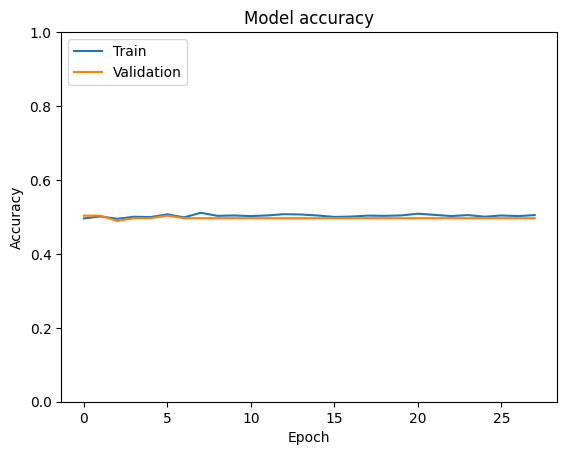

In [333]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim([0, 1])
plt.show()

In [334]:

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[ 978    0]
 [1031    0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.65       978
           1       0.00      0.00      0.00      1031

    accuracy                           0.49      2009
   macro avg       0.24      0.50      0.33      2009
weighted avg       0.24      0.49      0.32      2009



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Save the Model
Save the trained model for submission.

In [325]:
model.save('ann_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:



1.   i used label encoder as one hot encoder will make more than 2000 clolumns makeing the data set to big to deal with

2.   firstly i used an input layer with the number of inputs as the units and then i used 7 hiden layers and one output layer with one uints and the actvion sigmoid

3.   i started a try and error and i found out that this compnition give me the best accurcy (even if it bad right now)

4.   i used relu as it give me what i need form the data and it does not return negtuive values
5.  i used dropout to prevernt over fitting


6.   i used calssfiction report as it give me a summery of the model preformence


8.   the model encoter under fitting and i tried resloveing that by makeing the model more complex but that did not work

